In [12]:
##import the necessary packages.

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import time
import math

#set the random seed to obtain outcomes.
np.random.seed(0)
tf.random.set_seed(0)

## Data Generation

In [13]:
#Extract the MINIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

#change into black and white
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255



In [14]:
#Seperate the different data
#discard the label data because of unsupervised learning
digit1_train=X_train[y_train==1]
digit2_train=X_train[y_train==2]
digit3_train=X_train[y_train==3]
digit4_train=X_train[y_train==4]
digit5_train=X_train[y_train==5]
digit6_train=X_train[y_train==6]
digit7_train=X_train[y_train==7]
digit8_train=X_train[y_train==8]
digit9_train=X_train[y_train==9]
digit0_train=X_train[y_train==0]


digit1_test=X_test[y_test==1]
digit2_test=X_test[y_test==2]
digit3_test=X_test[y_test==3]
digit4_test=X_test[y_test==4]
digit5_test=X_test[y_test==5]
digit6_test=X_test[y_test==6]
digit7_test=X_test[y_test==7]
digit8_test=X_test[y_test==8]
digit9_test=X_test[y_test==9]
digit0_test=X_test[y_test==0]

In [15]:
angle_list=[30,60,120,150,210,240,300,330]


In [16]:
#define a rotation function 
#it rotates the image with the list of angle.
def rotation(angle_list,inputs):
    output_list=[]
    height=inputs[0].shape[0]                                   #define the height of the image
    width=inputs[0].shape[1]
    for k in range(inputs.shape[0]):
        for angle in angle_list:
            angle=math.radians(angle)                               #converting degrees to radians
            cosine=math.cos(angle)
            sine=math.sin(angle)
            # Define the height and width of the new image that is to be formed
            new_height  = round(abs(inputs[k].shape[0]*cosine)+abs(inputs[k].shape[1]*sine))+1
            new_width  = round(abs(inputs[k].shape[1]*cosine)+abs(inputs[k].shape[0]*sine))+1
    
            # define another image variable of dimensions of new_height and new _column filled with zeros
            output=np.zeros((new_height,new_width))#,image.shape[2]))
        
            # Find the centre of the image about which we have to rotate the image
            original_centre_height   = round(((inputs[k].shape[0]+1)/2)-1)    #with respect to the original image
            original_centre_width    = round(((inputs[k].shape[1]+1)/2)-1)    #with respect to the original image
    
            # Find the centre of the new image that will be obtained
            new_centre_height= round(((new_height+1)/2)-1)        #with respect to the new image
            new_centre_width= round(((new_width+1)/2)-1)          #with respect to the new image
        
            for i in range(height):
                for j in range(width):
                    #co-ordinates of pixel with respect to the centre of original image
                    y=inputs[k].shape[0]-1-i-original_centre_height                   
                    x=inputs[k].shape[1]-1-j-original_centre_width
                    
                    #Here we need round it back into intergers because of pixels.
                    new_y=round(-x*sine+y*cosine)
                    new_x=round(x*cosine+y*sine)
                
                    new_y=new_centre_height-new_y
                    new_x=new_centre_width-new_x
                    ###check 
                    if 0 <= new_x < new_width and 0 <= new_y < new_height and new_x>=0 and new_y>=0:
                        output[new_y,new_x]=inputs[k,i,j]
            output_list.append(output)
    output_list=np.asarray(output_list)
    return output_list

In [17]:
%%time
output_list_digit5=rotation(angle_list,digit5_train)

CPU times: user 59.1 s, sys: 1.24 s, total: 1min
Wall time: 1min 3s


In [18]:
#Define a function to plot pixels.
def plot_image(image):
    plt.imshow(image, cmap="gray")
    plt.axis("off")

In [19]:
angle_list=[0,90,180,270]
output_list_digit5_r=rotation(angle_list,digit5_train)

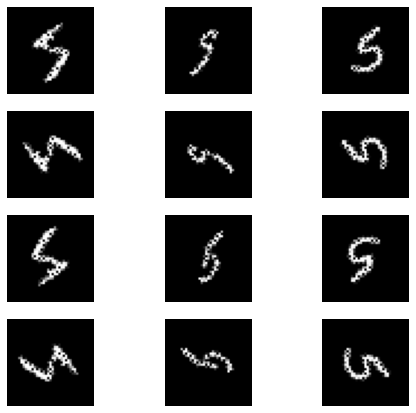

In [20]:
#Show randomly selected observations motion trajectory in frames.
#The angle in angle list is all not a multiple of 90 degree
fig = plt.figure(figsize=(8, 15))
index=list(range(0,8,2))
index_=list(range(0,12,3))
for image_index in range(4):
    plt.subplot(8, 3, index_[image_index]+1)
    plot_image(output_list_digit5[index[image_index]])
for image_index in range(4):
    plt.subplot(8, 3, index_[image_index]+2)
    plot_image(output_list_digit5[12+index[image_index]])
for image_index in range(4):
    plt.subplot(8, 3, index_[image_index]+3)
    plot_image(output_list_digit5[120+index[image_index]])
#plt.savefig('digit5.jpg')

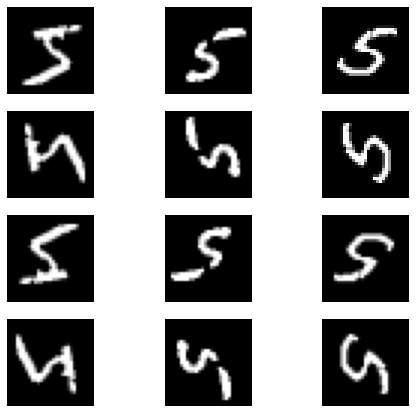

In [21]:
#Show randomly selected observations motion trajectory in frames.
#The angle in angle list is all a multiple of 90 degree
fig = plt.figure(figsize=(8, 15))
index=list(range(4))
index_=list(range(0,24,3))
for image_index in range(4):
    plt.subplot(8, 3, index_[image_index]+1)
    plot_image(output_list_digit5_r[index[image_index]])
for image_index in range(4):
    plt.subplot(8, 3, index_[image_index]+2)
    plot_image(output_list_digit5_r[12+index[image_index]])
for image_index in range(4):
    plt.subplot(8, 3, index_[image_index]+3)
    plot_image(output_list_digit5_r[120+index[image_index]])
#plt.savefig('digit5_90.jpg')

In [22]:
output_list_digit5.shape

(43368, 39, 39)

In [23]:
output_list_digit5_r.shape

(21684, 29, 29)

In [24]:
x_train=output_list_digit5[:30000,:]
x_valid=output_list_digit5[30000:43368,:]

In [25]:
x_train=output_list_digit5_r[:15000,:]
x_valid=output_list_digit5_r[15000:21684,:]

In [26]:
#define the loss function
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [27]:
#define the Gaussian distribution according to Reparameterization Trick in order to calculate latent variable z
K = keras.backend
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean 

In [28]:
#define a function to show reconstructions according to the diversity of latent space dimensionality.
#here we only focus on the dimension of latent variable 


#Here we pre-defined the VAE layers so that the shape need to be manually adjusted
def VAE(codings_size_val):
    tf.random.set_seed(42)
    np.random.seed(42)
    ###latent space dimension
    codings_size = codings_size_val
    #Encoder
    inputs = keras.layers.Input(shape=[29, 29])          #pixels according to the inputs
    z = keras.layers.Flatten()(inputs)                   #Flatten the features
    z = keras.layers.Dense(150, activation="selu")(z)    #fully connected Layer 1
    z = keras.layers.Dense(100, activation="selu")(z)    #fully connected Layer 2
    codings_mean = keras.layers.Dense(codings_size)(z)   #Latent space
    codings_log_var = keras.layers.Dense(codings_size)(z)#Sampling Gaussian distribution
    codings = Sampling()([codings_mean, codings_log_var])
    variational_encoder = keras.models.Model(
        inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])
    ###########################################################################
    #Decoder
    decoder_inputs = keras.layers.Input(shape=[codings_size])
    x = keras.layers.Dense(100, activation="selu")(decoder_inputs)     #fully connected Layer 1
    x = keras.layers.Dense(150, activation="selu")(x)                  #fully connected Layer 2
    x = keras.layers.Dense(29 * 29, activation="sigmoid")(x)           #Output Layer
    outputs = keras.layers.Reshape([29, 29])(x)
    variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs]) #combined encoder and decoder
    ###########################################################################
    _, _, codings = variational_encoder(inputs)
    reconstructions = variational_decoder(codings) #how to structure reconstructions
    variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])
    ###########################################################################
    #regularization term
    latent_loss = -0.5 * K.sum(
        1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
        axis=-1)
    variational_ae.add_loss(K.mean(latent_loss) / 841.) 
    variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop",metrics=[rounded_accuracy])
    #return the model
    return variational_ae

In [37]:
#define a function to show reconstructions 
def show_reconstructions(model, images=x_valid, n_images=4):
    #counts=images.shape[0]/12
    #randoms=np.random.randint(0,counts,n_images)
    #index=12 * randoms
    #index=list(range(12))
    ids=[0,6680]
    index=list(range(ids[0],ids[0]+n_images))+list(range(ids[1],ids[1]+n_images))
    reconstructions = model.predict(images[index])
    fig = plt.figure(figsize=(n_images * 3, 5))
    
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.title('Original image')
        plot_image(images[index[image_index]])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])
        plt.title('Reconstructed image')




In [38]:
x_valid.shape

(6684, 29, 29)

## How we decide the suitable dimensionality of latent space

In [39]:
Performance_dim=[2,3,5,10]

def performance(Performance_dim):
    Performance_loss=[]
    Performance_time=[]
    for i in Performance_dim:
        
        variational_ae=VAE(i)
        import time
        time_start=time.time()
        history = variational_ae.fit(x_train, x_train, epochs=10,
                             validation_data=(x_valid, x_valid),verbose=0)
        time_end=time.time()
        time=time_end-time_start
        Performance_time.append(time)
        Performance_loss.append(history.history['loss'][-1])
        show_reconstructions(variational_ae)
        #plt.savefig('digit5 rotation_dimension'+str(i)+'.jpg')
    return Performance_time,Performance_loss

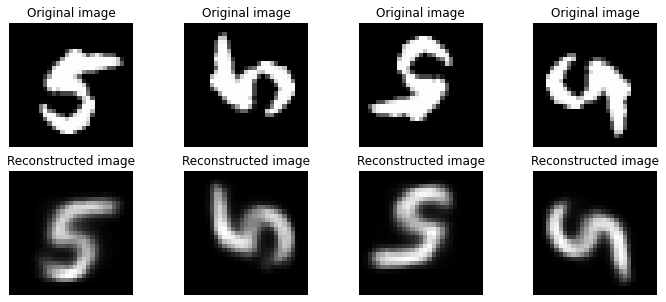

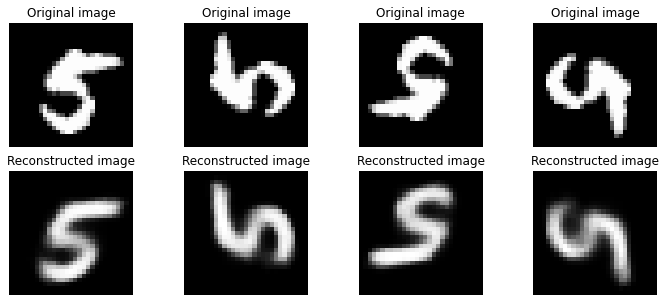

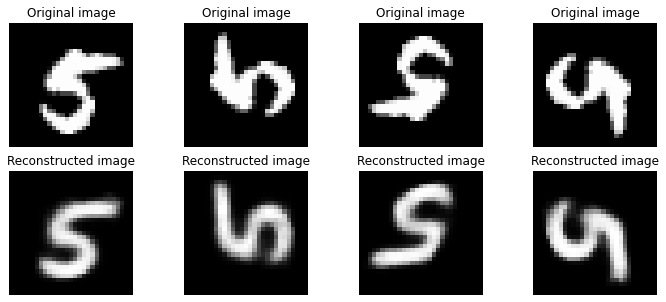

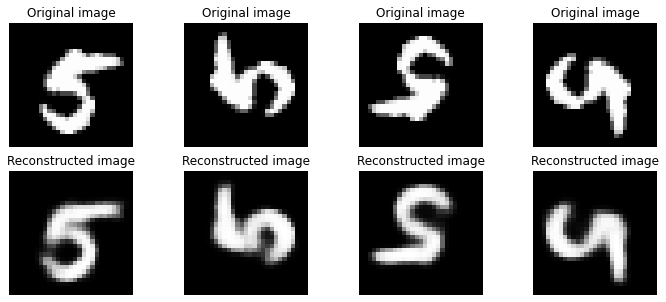

In [40]:
#Here we trained the rotation degree is not a multiple of 90 degree
Performance_time,Performance_loss=performance(Performance_dim)

In [ ]:
performance = pd.DataFrame({'Dimension': Performance_dim,'loss': Performance_loss, 'time':Performance_time})
performance

## How to identify the underlying meaning of latent variables in chosen latent space? 

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

#############################################
#according to the previous outcome 
#the latent space dimensionality determined 
codings_size = 3

inputs = keras.layers.Input(shape=[39, 39])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])
###########################################################################
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(39 * 39, activation="sigmoid")(x)
outputs = keras.layers.Reshape([39, 39])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])
###########################################################################
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])
###########################################################################
latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 1521.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop",metrics=[rounded_accuracy])


history = variational_ae.fit(x_train, x_train, epochs=10,
                             validation_data=(x_valid, x_valid),verbose=0)
latent=variational_encoder(x_valid)[2].numpy()

In [ ]:
#model summary
#variational_ae.summary()

In [ ]:
#summary the statistics of latent variables
df=pd.DataFrame(latent)
summarys=df.describe()
summarys

### The sampling about quantitive method

In [ ]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(10, 10))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.title('Index '+str(index+1))
        plt.axis("off")

In [ ]:
#The latent variables of quantitive method to reveal the underlying meaning of latent variables.

latent_withoutadjusted=np.zeros((8,3))
latent_withoutadjusted1=np.zeros((8,3))
latent_withoutadjusted2=np.zeros((8,3))


latent_withoutadjusted[:,0]=latent[8:16,0]
latent_withoutadjusted1[:,1]=latent[8:16,1]
latent_withoutadjusted2[:,2]=latent[8:16,2]

for i in range(8):
    latent_withoutadjusted[i,1:3]=latent[8,1:3]
    latent_withoutadjusted1[i,[0,2]]=latent[8,[0,2]]
    latent_withoutadjusted2[i,[0,1]]=latent[8,[0,1]]
    
latent_withoutadjusted.sort(axis=0)
latent_withoutadjusted1.sort(axis=0)
latent_withoutadjusted2.sort(axis=0)

In [ ]:
latent_adjusted

In [ ]:
tf.random.set_seed(42)
#shape=[number,latent-dimension-size]
#codings = tf.random.normal(shape=[12, 5])
codings=tf.constant(latent[8:16,:])
images = variational_decoder(codings).numpy()
plot_multiple_images(images, 4)

In [ ]:
latent_adjusted

In [ ]:
tf.random.set_seed(42)
#shape=[number,latent-dimension-size]
#codings = tf.random.normal(shape=[12, 5])
codings=tf.constant(latent_withoutadjusted)
images = variational_decoder(codings).numpy()
plot_multiple_images(images, 4)
plt.savefig('digit5_latent0.jpg')

In [ ]:
latent_adjusted1

In [ ]:
tf.random.set_seed(42)
#shape=[number,latent-dimension-size]
#codings = tf.random.normal(shape=[12, 5])
codings=tf.constant(latent_withoutadjusted1)
images = variational_decoder(codings).numpy()
plot_multiple_images(images, 4)
plt.savefig('digit5_latent1.jpg')

In [ ]:
latent_adjusted2

In [ ]:
tf.random.set_seed(42)
#shape=[number,latent-dimension-size]
#codings = tf.random.normal(shape=[12, 5])
codings=tf.constant(latent_withoutadjusted2)
images = variational_decoder(codings).numpy()
plot_multiple_images(images, 4)
plt.savefig('digit5_latent2.jpg')

In [ ]:
# more examples

latent_copy=np.zeros((8,3))

latent_copy1=np.zeros((8,3))
latent_copy2=np.zeros((8,3))


latent_copy[:,0]=latent[24:32,0]
latent_copy1[:,1]=latent[24:32,1]
latent_copy2[:,2]=latent[24:32,2]

for i in range(8):
    latent_copy[i,1:3]=latent[24,1:3]
    latent_copy1[i,[0,2]]=latent[24,[0,2]]
    latent_copy2[i,[0,1]]=latent[24,[0,1]]
    
latent_copy.sort(axis=0)
latent_copy1.sort(axis=0)
latent_copy2.sort(axis=0)

In [ ]:
tf.random.set_seed(42)
#shape=[number,latent-dimension-size]
#codings = tf.random.normal(shape=[12, 5])
codings=tf.constant(latent[24:36])
images = variational_decoder(codings).numpy()
plot_multiple_images(images, 4)

In [ ]:
latent_copy

In [ ]:
tf.random.set_seed(42)
#shape=[number,latent-dimension-size]
#codings = tf.random.normal(shape=[12, 5])
codings=tf.constant(latent_copy1)
images = variational_decoder(codings).numpy()
plot_multiple_images(images, 4)

In [ ]:
latent_copy2

In [ ]:
tf.random.set_seed(42)
#shape=[number,latent-dimension-size]
#codings = tf.random.normal(shape=[12, 5])
codings=tf.constant(latent_copy2)
images = variational_decoder(codings).numpy()
plot_multiple_images(images, 4)

In [ ]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

np.random.seed(1)
randoms=np.random.randint(0,1114,5)
#transparent
alphas=[0.75, 0.75, 0.6, 0.5, 0.5]
#color
cmap_list=['Blues_r','Purples_r','Greens_r','Oranges_r','spring_r','gray']
plt.figure(figsize=(10, 10))
plt.grid(True)
for i in range(5):
    cmap = plt.cm.jet
    cNorm  = colors.Normalize(vmin=0, vmax=8)
    scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=plt.get_cmap(cmap_list[i]))
    
    for j in range(7):  
        
        colorVal = scalarMap.to_rgba(j)
        plt.scatter(latent[randoms[i]*8][1], latent[randoms[i]*8][0],marker='x',color=scalarMap.to_rgba(0) ,s=50)
        plt.arrow(latent[randoms[i]*8+j][1], latent[randoms[i]*8+j][0], 
                  latent[randoms[i]*8+j+1,1]-latent[randoms[i]*8+j,1], latent[randoms[i]*8+j+1,0]-latent[randoms[i]*8+j,0], 
                  length_includes_head=True, head_width=0.1, lw=2,alpha=alphas[i],
                  color=colorVal)
plt.xlabel('Latent variable 1')
plt.ylabel('Latent variable 0')
plt.savefig('digit5_motion_2d.jpg')

In [ ]:
cmap_list=['Blues_r','Purples_r','Greens_r','Oranges_r','spring_r','gray']
fig=plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for i in range(5):
    cmap = plt.cm.jet
    cNorm  = colors.Normalize(vmin=0, vmax=10)
    scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=plt.get_cmap(cmap_list[i]))
    ax.scatter(latent[randoms[i]*8][0], latent[randoms[i]*8][1],latent[randoms[i]*8][2],marker='x',color=scalarMap.to_rgba(0),s=50)
    ax.scatter(latent[randoms[i]*8+7][0], latent[randoms[i]*8+7][1],latent[randoms[i]*8+7][2],marker='h',color=scalarMap.to_rgba(7),s=100)
    for j in range(8): 
        colorVal = scalarMap.to_rgba(j)
        ax.scatter(latent[randoms[i]*8+j,0],latent[randoms[i]*8+j,1],latent[randoms[i]*8+j,2],color=colorVal)
    for k in range(7):
        colorVal = scalarMap.to_rgba(k)
        ax.plot3D(latent[randoms[i]*8+k:randoms[i]*8+k+2,0],latent[randoms[i]*8+k:randoms[i]*8+k+2,1],latent[randoms[i]*8+k:randoms[i]*8+k+2,2],
                  color=colorVal,alpha=alphas[i],)  
ax.set_xlabel('Latent variable 0')
ax.set_ylabel('Latent variable 1')
ax.set_zlabel('Latent variable 2')
plt.savefig('digit5_motion_3d.jpg')
plt.show()




In [ ]:
cmap_list=['Blues_r','Purples_r','Greens_r','Oranges_r','spring_r','gray']
plt.figure(figsize=(10, 10))
plt.grid(True)
ids=0
for i in range(5):
    cmap = plt.cm.jet
    cNorm  = colors.Normalize(vmin=0, vmax=10)
    scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=plt.get_cmap(cmap_list[i]))
    for j in range(7):        
        colorVal = scalarMap.to_rgba(j)
        plt.arrow(latent[randoms[i]*8+j][0], i, latent[randoms[i]*8+j+1,0]-latent[randoms[i]*8+j,0], 0, 
                  length_includes_head=True, head_width=0.1, lw=2,
                  color=colorVal)
    ids+=1
plt.xlabel('Latent variable 0')
plt.ylabel('Index')
plt.savefig('digit5_motion_1d1.jpg')

In [ ]:
cmap_list=['Blues_r','Purples_r','Greens_r','Oranges_r','spring_r','gray']
plt.figure(figsize=(10, 10))
plt.grid(True)
ids=0
for i in range(5):
    cmap = plt.cm.jet
    cNorm  = colors.Normalize(vmin=0, vmax=10)
    scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=plt.get_cmap(cmap_list[i]))
    for j in range(7):        
        colorVal = scalarMap.to_rgba(j)
        plt.arrow(latent[randoms[i]*8+j][1], i, latent[randoms[i]*8+j+1,1]-latent[randoms[i]*8+j,1], 0, 
                  length_includes_head=True, head_width=0.1, lw=2,
                  color=colorVal)
    ids+=1
plt.xlabel('Latent variable 1')
plt.ylabel('Index')
plt.savefig('digit5_motion_1d2.jpg')